In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
refdf = pd.read_csv('prelim_bottle.csv')


In [6]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 8.00e-01, 6.91e+04
gamma^D_h  = 8.00e-01, 6.91e+04
R_p  = 6.62e+00, 5.72e+05
R_h  = 6.62e+00, 5.72e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 0.00e+00, 0.00e+00
E^I_h  = 1.16e-06, 1.00e-01
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 1.43e-01, 1.23e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 2.50e-01, 2.16e+04
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 1.40e-09, 1.21e-04
Vmax^IN_p  = 1.00e-05, 8.64e-01
Vmax^OC_p  = 9.27e-09, 8.01e-04
Vmax^IC_p  = 9.27e-05, 8.01e+00
Vmax^ON_h  = 5.00e-06, 4.32e-01
Vmax^IN_h  = 5.00e-06, 4.32e-01
Vmax^OC_h  = 3.31e-05, 2.86e+00
Vmax^IC_h  = 3.31e-09, 2.86e-04
O_p  = 1.00e+00, 8.64e+04
O_h  = 1.00e+00, 8.64e+04
epsilon  = 1.05e-06, 9.09e-02
VTmax  = 2.50e-06, 2.16e-01
KT_h  = 2.50e-01, 2.16e+04
omega  = 1.00e-02, 8.64e+02
K^S_p  = 1.43e+01, 1.23e+06
K^S_h  = 1.43e+01, 1.23e+06
E^S_p  = 1.

In [7]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [8]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_honly_data()

In [9]:
print_dydt0(calc_dydt, var_names, init_vars)


dBh/dt = 4.76e-05, init Bh = 8.80e+01, newval = 8.80e+01
dDON/dt = -3.53e-04, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 2.04e-05, init RDON = 0.00e+00, newval = 2.04e-05
dDIN/dt = 2.85e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -2.37e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 1.35e-04, init RDOC = 0.00e+00, newval = 1.35e-04
dDIC/dt = 1.92e-03, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = -0.00e+00, init ROS = 0.00e+00, newval = 0.00e+00
dSp/dt = 0.00e+00, init Sp = 0.00e+00, newval = 0.00e+00
dSh/dt = 1.16e-15, init Sh = 0.00e+00, newval = 1.16e-15


In [10]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xh   = 1.00e+10
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.98e-01
gross_uptakeINh = 4.39e-04
gross_uptakeONh = 4.34e-04
gross_uptakeICh = 2.91e-07
gross_uptakeOCh = 2.91e-03
actual_uptakeNh = 4.39e-04
overflowNh = 4.34e-04
overflowCh = 1.73e-18
deathh = 1.02e-04
exudationOh = 0.00e+00
exudationIh = 1.02e-04
Tbreakdownh = 0.00e+00
respirationh = 1.88e-04
dic_uptake = -1.04e-16


In [11]:
biomass_diff0_honly(calc_dydt, var_names,init_vars)


dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -1.1571147685851546e-15


In [12]:
init_vars

In [13]:
sol = run_solver(calc_dydt, init_vars)

In [14]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [15]:
df.head()

,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,Sp,Sh,...,overflowCh,deathh,exudationOh,exudationIh,Tbreakdownh,respirationh,dic_uptake,Bh[C],Sp[C],Sh[C]
0,88.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.0,0.0,0.000000e+00,...,1.734723e-18,0.000102,0.0,0.000102,0.0,0.000188,-1.040834e-16,583.000000,0.0,0.000000e+00
1,88.686288,14.910396,0.294477,104.108840,98.273581,1.950909,3024.235627,0.0,0.0,1.673164e-11,...,2.168404e-18,0.000103,0.0,0.000103,0.0,0.000189,-4.645162e-04,587.546656,0.0,1.108471e-10
2,89.371909,9.818971,0.591241,108.217879,63.821403,3.916974,3042.813824,0.0,0.0,3.359326e-11,...,1.734723e-18,0.000103,0.0,0.000103,0.0,0.000191,-8.205983e-04,592.088894,0.0,2.225553e-10
3,90.046839,4.781555,0.890279,112.281327,29.212030,5.898097,3057.097207,0.0,0.0,5.058403e-11,...,1.734723e-18,0.000104,0.0,0.000104,0.0,0.000192,-1.094363e-03,596.560310,0.0,3.351192e-10
4,89.877634,0.345708,1.191251,116.585408,0.056910,7.892035,3068.037001,0.0,0.0,6.768469e-11,...,2.168404e-19,0.000104,0.0,0.000104,0.0,0.000188,-1.304043e-03,595.439325,0.0,4.484111e-10


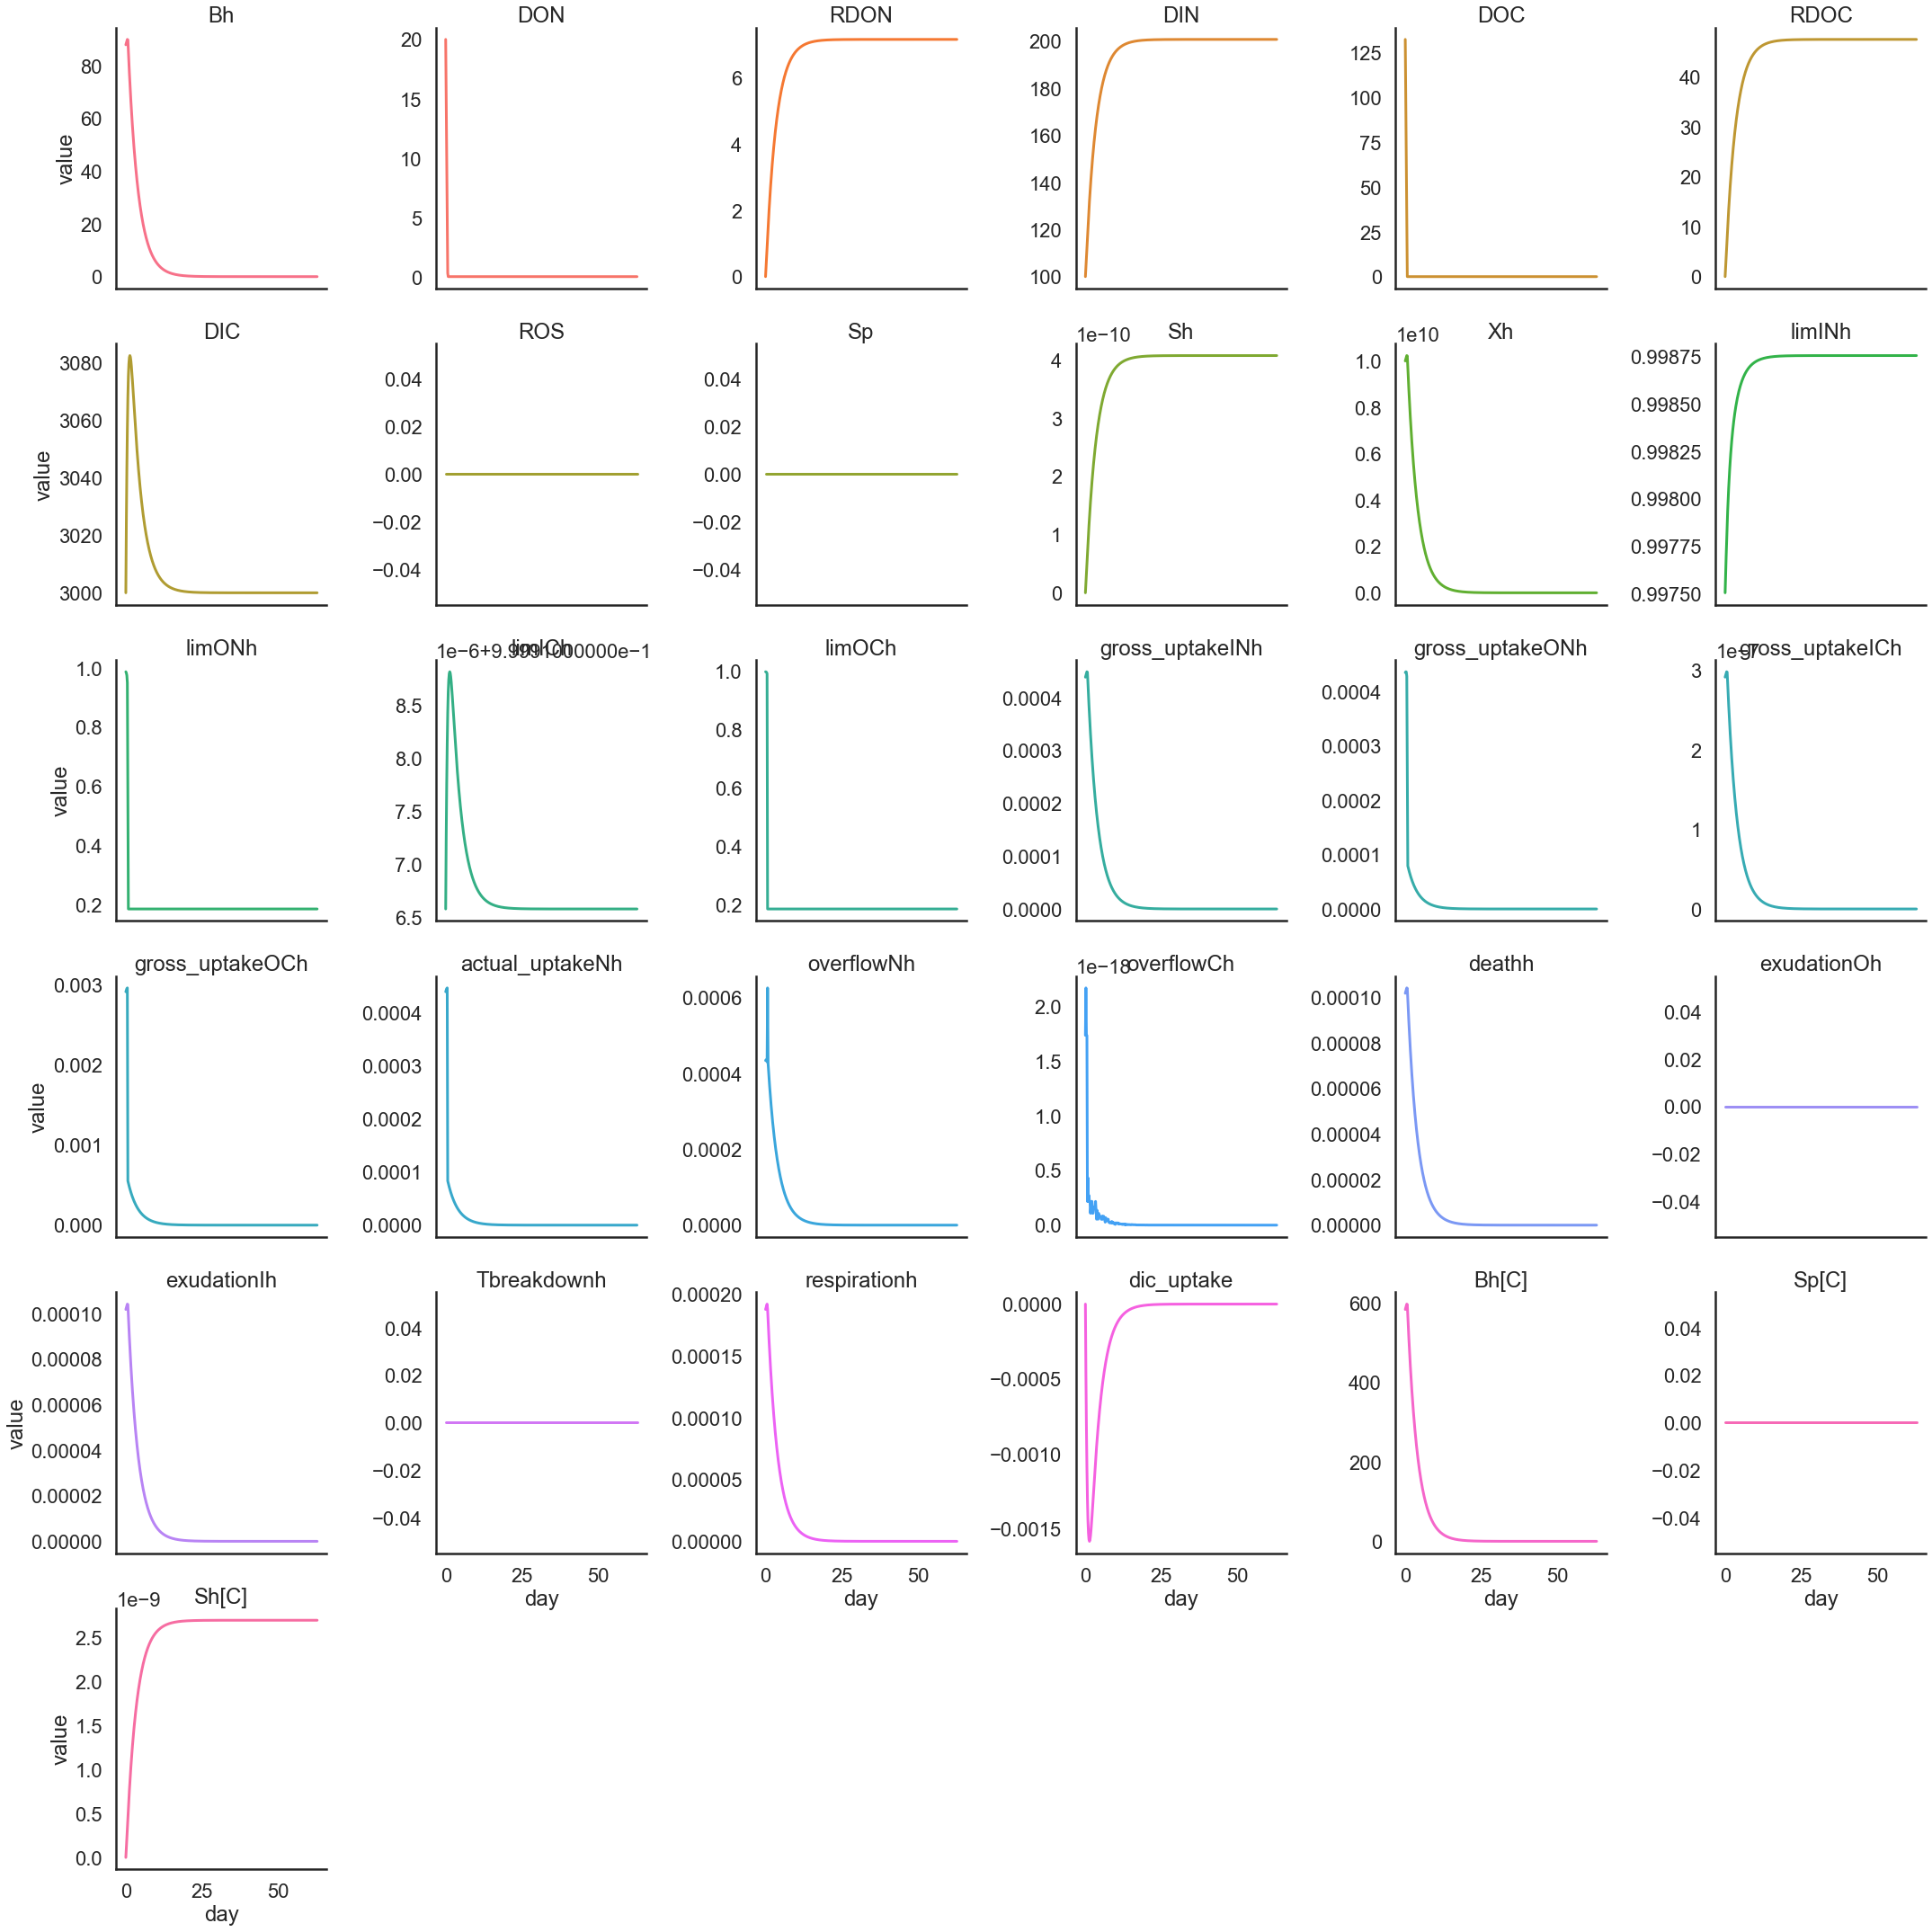

In [16]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [17]:
refdf.columns

Index(['Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312',
       'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]', 'Bh[C]',
       'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

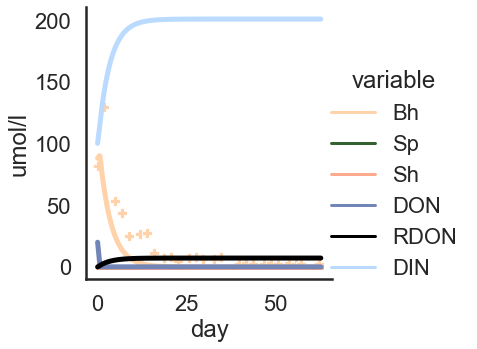

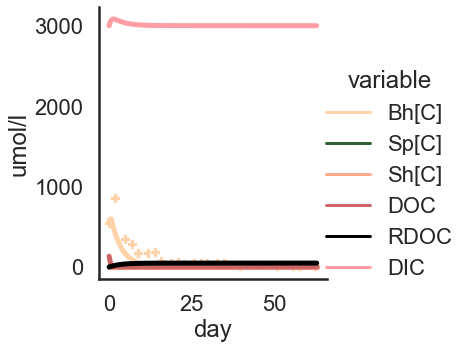

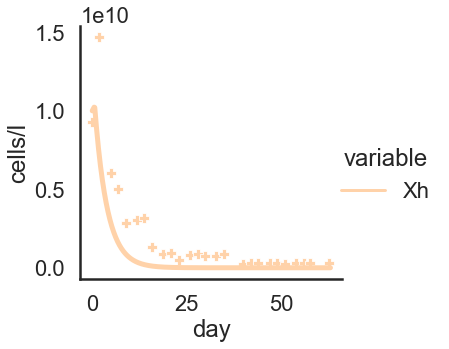

In [18]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hnpalette, hue_order=hnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hcpalette, hue_order=hcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False, color=HCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

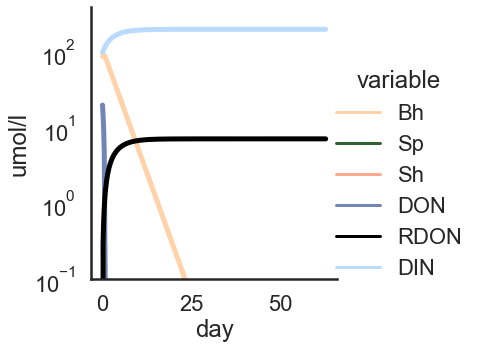

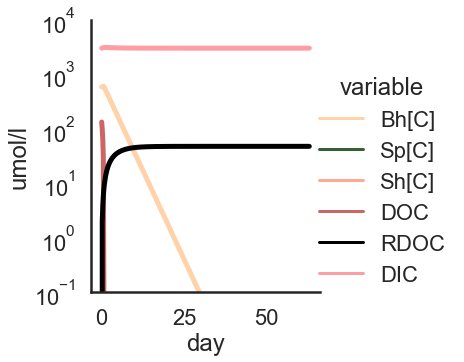

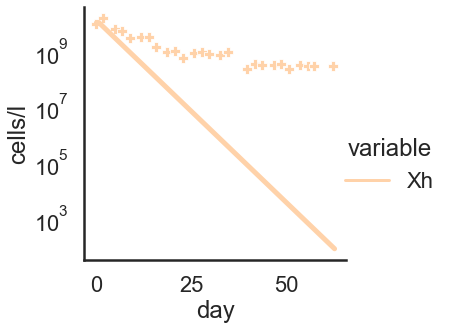

In [19]:
sns.relplot(data=mdf.loc[mdf.variable.isin(hnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hnpalette, hue_order=hnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,4e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(hcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=hcpalette, hue_order=hcorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5,
            palette=[HCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='1A3', ax=g.ax, s=100, legend=False,color=HCOLOR_light, marker='P')


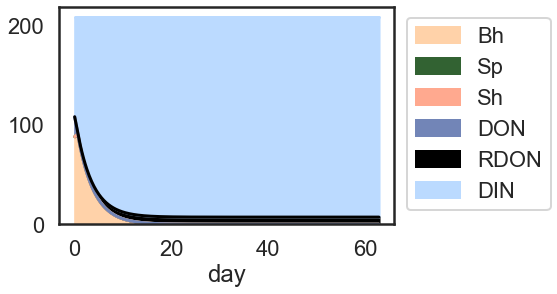

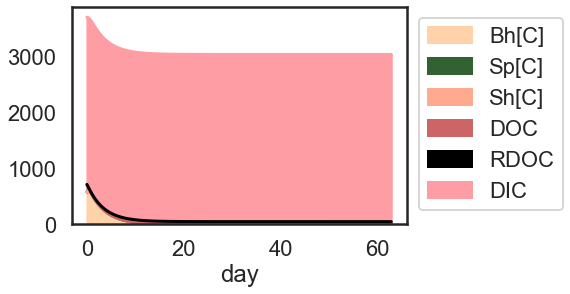

In [20]:
from matplotlib.colors import LinearSegmentedColormap
df[hnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[hcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", hcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()

In [21]:
len(param_vals)

In [22]:
df.min()

Bh                 6.817336e-07
DON                5.690947e-02
RDON               0.000000e+00
DIN                1.000000e+02
DOC                5.690947e-02
RDOC               0.000000e+00
DIC                3.000000e+03
ROS                0.000000e+00
Sp                 0.000000e+00
Sh                 0.000000e+00
t                  0.000000e+00
day                0.000000e+00
Xh                 7.746973e+01
limINh             9.975035e-01
limONh             1.852632e-01
limICh             9.999166e-01
limOCh             1.852632e-01
gross_uptakeINh    3.402992e-12
gross_uptakeONh    6.312349e-13
gross_uptakeICh    2.257104e-15
gross_uptakeOCh    4.181931e-12
actual_uptakeNh    6.315755e-13
overflowNh         3.402651e-12
overflowCh         1.615587e-27
deathh             7.890436e-13
exudationOh        0.000000e+00
exudationIh        7.890436e-13
Tbreakdownh        0.000000e+00
respirationh       1.426594e-12
dic_uptake        -1.583216e-03
Bh[C]              4.516485e-06
Sp[C]   

In [23]:
dir(sol)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y',
 'y_events']